In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re
import requests
import bs4
import html5lib
%matplotlib inline
pd.set_option('display.max_row', 4000)
pd.set_option('display.max_columns', 100)

In [194]:
# Using encoding = "ISO-8859-1"
companies = pd.read_csv("C:/Users/anupama/Documents/UPGRAD/CaseStudy/companies.txt", delimiter="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("C:/Users/anupama/Documents/UPGRAD/CaseStudy/rounds2.csv",encoding = "ISO-8859-1")
print("Companies : ", companies.columns)
print("Rounds2 : ",rounds2.columns)


Companies :  Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')
Rounds2 :  Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')


# Checkpoint 1: Data Cleaning 1

In [195]:
##Table 1.1 -- 1 and 2
#using vectorized function to convert the case to upper for both permalink columns in the two dataframes
rounds2['company_permalink']=rounds2['company_permalink'].str.upper()
companies['permalink']=companies['permalink'].str.upper()

#Count of unique company names in companies and rounds2
print("Unique Company names in Company : " , companies['permalink'].nunique())
print("Unique Company names in Rounds2 : ",rounds2['company_permalink'].nunique())

Unique Company names in Company :  66368
Unique Company names in Rounds2 :  66370


In [196]:
##Table 1.1 -- 3
#Total rows in companies
len(companies)

uniquecol=[col for col in companies.columns if (companies[col].nunique()==len(companies))]
print("Unique Column Name in Company data : ", "".join(uniquecol))

##Since the total rows in companies is equal to the number of unique values in the Company['permalink'] column. 
##Therefore 'permalink' can be used as the unique column

Unique Column Name in Company data :  permalink


In [197]:
## Table 1.1 -- 4
#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

## Merge the companies and rounds2 dataset, 
##if the number of uniqe company names in the merged dataset is equal to the number of unique datasets in companies dataset, 
##then we can say that there are no companies in rounds2 that are not there in companies

## Renaming the company_permalink column in rounds2 to permalink to be able to perform the merge
rounds2.rename(columns={'company_permalink' : "permalink"},inplace=True)
master_frame = pd.merge(rounds2,companies,how="inner",on="permalink")
print("Unique companies in the merged dataset : ", master_frame['permalink'].nunique())
print("Unique companies in the companies dataset : ", companies['permalink'].nunique())
if (master_frame['permalink'].nunique() == companies['permalink'].nunique()):
    print("There are no companies in rounds2 that are not there in companies ")
else:
    print("There are companies in rounds2 that are not there in companies ")

Unique companies in the merged dataset :  66363
Unique companies in the companies dataset :  66368
There are companies in rounds2 that are not there in companies 


In [198]:
## Table 1.1 -- 5
# How many observations are present in master_frame ?

print("Number of Observations in the Master Frame : ",len(master_frame))


Number of Observations in the Master Frame :  114942


Cleaning Master Data Frame

In [199]:
print("Number of Missing Values in each column in Master Frame ")
print(master_frame.isnull().sum())

Number of Missing Values in each column in Master Frame 
permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64


In [200]:
## Find the current % of missing values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

We have about 17% missing values in the column ```raised_amount_usd```. Since ```raised_amount_usd``` contains a lot of missing data (and imputing 17% values of a variable we want to base our investigatino on will introduce heavy bias), therfore we will remove these rows

In [201]:
# removing NaN raised_amount_usd rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

Dropping the funding_round_code column because it contains about 70% missing values, and in any case this column will not contribute much to our analysis

In [202]:
## Dropping funding_round_code column
master_frame = master_frame.drop('funding_round_code', axis=1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

# Checkpoint 2: Funding Type Analysis

In [203]:
## Table 2.1 -- 1
#Average funding amount of venture type

print(master_frame.columns)
df_venture=master_frame[master_frame['funding_round_type']=='venture']
print("Average funding for Venture : ", round(df_venture['raised_amount_usd'].mean(),3))

print(df_venture.describe())


Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at'],
      dtype='object')
Average funding for Venture :  11748949.129
       raised_amount_usd
count       5.022800e+04
mean        1.174895e+07
std         8.635207e+07
min         0.000000e+00
25%         1.600902e+06
50%         5.000000e+06
75%         1.200000e+07
max         1.760000e+10


In [204]:
## Table 2.1 -- 2
#Average funding amount of angel type

df_angel=master_frame[master_frame['funding_round_type']=='angel']
print("Average funding for Angel : ",round(df_angel['raised_amount_usd'].mean(),3))
print(df_angel.describe())

Average funding for Angel :  958694.47
       raised_amount_usd
count       4.860000e+03
mean        9.586945e+05
std         7.404397e+06
min         0.000000e+00
25%         1.500000e+05
50%         4.000000e+05
75%         1.000000e+06
max         4.945120e+08


In [205]:
## Table 2.1 -- 3
#Average funding amount of seed type

df_seed =master_frame[master_frame['funding_round_type']=='seed']
print("Average funding for Seed : ",round(df_seed['raised_amount_usd'].mean(),3))
print(df_seed.describe())

Average funding for Seed :  719779.62
       raised_amount_usd
count       2.360200e+04
mean        7.197796e+05
std         2.221772e+06
min         0.000000e+00
25%         5.500000e+04
50%         2.750000e+05
75%         1.000000e+06
max         2.000000e+08


In [206]:
## Table 2.1 -- 4
#Average funding amount of private equity type

df_private_equity =master_frame[master_frame['funding_round_type']=='private_equity']
print("Average funding for private_equity : ",round(df_private_equity['raised_amount_usd'].mean(),3))

print(df_private_equity.describe())


Average funding for private_equity :  73308593.029
       raised_amount_usd
count       1.936000e+03
mean        7.330859e+07
std         1.981135e+08
min         0.000000e+00
25%         5.000000e+06
50%         2.000000e+07
75%         7.500000e+07
max         4.745460e+09



# Checkpoint 3: Country Analysis


In [207]:
import PyPDF2

# reading the pdf file
pdf_object = open('C:/Users/anupama/Documents/UPGRAD/CaseStudy/Countries_where_English_is_an_official_language.pdf', 'rb')
pdf_reader = PyPDF2.PdfFileReader(pdf_object)

# Number of pages in the PDF file
print(pdf_reader.numPages)

# get a certain page's text
page_object = pdf_reader.getPage(0)

# Extract text from the page_object
print(page_object.extractText())
englishcountries = str(page_object.extractText())
print("***********")
print(type(englishcountries))


1
ListofcountrieswhereEnglishisanofficiallanguage
AfricaBotswanaCameroonEthiopiaEritrea
TheGambiaGhanaKenyaLesothoLiberiaMalawiMauritiusNamibiaNigeriaRwandaSeychellesSierraLeone
SouthAfricaSouthSudanSudanSwazilandTanzaniaUgandaZambiaZimbabwe
AmericasAntiguaandBarbudaTheBahamas
BarbadosBelizeCanadaDominicaGrenadaGuyanaJamaicaSaintKittsandNevisSaintLuciaSaintVincentandtheGrenadinesTrinidadandTobago
UnitedStates

AsiaIndiaPakistanPhilippinesSingaporeAustralia/OceaniaAustraliaFijiKiribatiMarshallIslandsFederatedStates
ofMicronesiaNauruNewZealand
PalauPapuaNewGuineaSamoaSolomonIslands
TongaTuvaluVanuatu
EuropeIrelandMaltaUnitedKingdom

***********
<class 'str'>


In [208]:
## Webscraping https://www.nationsonline.org/oneworld/country_code_list.htm to fetch the country code to country name mapping

# getting HTML from the Google Play web page
url = "https://www.nationsonline.org/oneworld/country_code_list.htm"
req = requests.get(url)

# create a bs4 object with html.parser
soup = bs4.BeautifulSoup(req.text, "html.parser")

# Extract the data from Table element ID #Codelist, that contains the country name to country code mapping
country=str(soup.find(id="codelist"))
print(country)



<table class="tb86 rowstyle-alternate colstyle-alt no-arrow" id="codelist">
<tr style="background-color:#BDCEE7">
<th style="width:20px;"> </th>
<th class="border1; sortable-text" style="width:225px; text-align:center"><strong>Country or Area Name</strong></th>
<th class="border1; sortable-text" style="width:162px; text-align:center"><span><strong>ISO "ALPHA-2 Code</strong></span></th>
<th class="border1; sortable-text" style="width:162px; text-align:center"><strong>ISO ALPHA-3 Code</strong></th>
<th class="border1; sortable-numeric" style="width:162px; text-align:center"><strong>ISO Numeric Code<br/>
          UN M49 Numerical Code</strong></th>
</tr>
<tr class="border1" style=" margin-top:3px; margin-bottom:3px">
<td style="width:20px"> </td>
<td> </td>
<td style="text-align:center"> </td>
<td style="text-align:center"> </td>
<td style="text-align:center"> </td>
</tr>
<tr class="border1" style=" margin-top:3px; margin-bottom:3px">
<td style="width:20px"><div class="flag" id="AFG"></d

In [209]:
## Convert the data extracted from the website to a Pandas Dataframe

# Read HTML table into a list of DataFrame object
from IPython.display import display_html

coundtryhtml = pd.read_html(country)
countrycode = coundtryhtml[0]
print(type(countrycode))
print(countrycode.head())


<class 'pandas.core.frame.DataFrame'>
    0                     1                  2                 3  \
0 NaN  Country or Area Name  ISO "ALPHA-2 Code  ISO ALPHA-3 Code   
1 NaN                   NaN                NaN               NaN   
2 NaN           Afghanistan                 AF               AFG   
3 NaN         Aland Islands                 AX               ALA   
4 NaN               Albania                 AL               ALB   

                                         4  
0  ISO Numeric Code  UN M49 Numerical Code  
1                                      NaN  
2                                      004  
3                                      248  
4                                      008  


In [210]:
## Clean up the data to drop the unwanted top two rows
countrycode.drop(countrycode.index[:2], inplace=True)

## Clean up the data to drop the unwanted columns and keep only the country name and the ISO ALPHA-3 Code column
countrycode.drop([0,2,4], axis = 1, inplace = True)
countrycode.head()

## Rename the columns
countrycode.rename(columns={1 : "country",3 : "country_code"},inplace=True)


In [211]:
## Change the country name from Unites States of America on the website to United States 
## to match the english speaking countrynames pdf 

idx=countrycode.index[countrycode['country'].str.contains("United States")]
countrycode.at[idx,'country']="United States"
print(countrycode)

                                          country country_code
2                                     Afghanistan          AFG
3                                   Aland Islands          ALA
4                                         Albania          ALB
5                                         Algeria          DZA
6                                  American Samoa          ASM
7                                         Andorra          AND
8                                          Angola          AGO
9                                        Anguilla          AIA
10                                     Antarctica          ATA
11                            Antigua and Barbuda          ATG
12                                      Argentina          ARG
13                                        Armenia          ARM
14                                          Aruba          ABW
15                                      Australia          AUS
16                                        Austria      

In [212]:
## Remove space from country name column from the data extracted from the website for comparision with PDF Extracted data

countrycode['country']=countrycode['country'].str.replace(' ', '')

## Our data from the website to map English Speaking Country Names to Country codes (master dataframe) is ready
print(countrycode.head())

         country country_code
2    Afghanistan          AFG
3   AlandIslands          ALA
4        Albania          ALB
5        Algeria          DZA
6  AmericanSamoa          ASM


In [213]:
## Downloded the countrycode CSV from the internet to facilitate the mapping between the country names in the PDF 
##to the country codes in the venture dataframe

#CSV for all country names and country codes for all countries of the world to map the country names in the PDF file 
##to the country codes in the df_venture dataframe

#countrycode = pd.read_csv("C:/Users/anupama/Documents/UPGRAD/CaseStudy/countries-code.csv")
#print("***************")
#countrycode.columns=['country','A2','code','num','dialingcode']
#countrycode = countrycode[['country','code']]
#print(countrycode.head())

#for col in countrycode.columns:
#    if(col!="country"):
#        countrycode[col] = countrycode[col].str.upper() ## Converting country code to upper for comparision with masterframe country code data
#    else:
#        countrycode[col] = countrycode[col].str.replace('\s+','') ## Removing space from country name for comparision with PDF Extract data
#print ("****************")
#print(countrycode.head())



In [214]:
## Merge the master_frame with the Country code based on country code

df_venture_merged = pd.merge(master_frame,countrycode,how = "inner",on='country_code')
df_venture_merged['English_Speaking']=df_venture_merged['country'].apply(lambda x : True if x in englishcountries else False)
print(df_venture_merged.columns)


Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'country', 'English_Speaking'],
      dtype='object')


In [215]:
## Top 9 countries (based on the total investment amount each country has received)

## All data from English Speaking countries for Venture
df_venture_merged_eng = df_venture_merged[(df_venture_merged['English_Speaking']==True)&(df_venture_merged['funding_round_type']=='venture')]

df_by_country = df_venture_merged_eng.groupby('country_code')

top9=pd.DataFrame(df_by_country['raised_amount_usd'].sum().sort_values(ascending=False))[0:9]

print(top9['raised_amount_usd'])
print(df_venture_merged_eng.columns)


country_code
USA    4.225108e+11
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
SGP    2.793918e+09
IRL    1.676131e+09
AUS    1.322935e+09
NZL    4.483164e+08
NGA    2.454400e+08
Name: raised_amount_usd, dtype: float64
Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'country', 'English_Speaking'],
      dtype='object')


In [216]:
##Table 3.1: Analysing the Top 3 English-Speaking Countries

print("Three most investment-friendly countries : ",top9[0:3])



Three most investment-friendly countries :                raised_amount_usd
country_code                   
USA                4.225108e+11
GBR                2.024563e+10
IND                1.439186e+10


# Sector Analysis


In [217]:
## Read the mapping file
sectormapping = pd.read_csv("C:/Users/anupama/Documents/UPGRAD/CaseStudy/mapping.csv",encoding = "ISO-8859-1")
sectormapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [218]:
##Cleaning Up mapping.csv file to replace Zero (0) in the category_list column with "na"

sectormapping.loc[:,'category_list']=sectormapping.loc[:,'category_list'].apply(lambda x: np.nan if type(x)==np.float else str(x).replace('0','na'))


In [219]:
## Business rule : The first string before the vertical bar will be considered the primary sector 
## Extract the primary sector of each category list from the category_list column


df_venture_merged_eng.loc[:,"primary"] = df_venture_merged_eng.loc[:,"category_list"].apply(lambda x: np.nan if type(x)==np.float else str(x.split('|')[0]))
df_venture_merged_eng.loc[:,"primary"].head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [indexing.py:288]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [indexing.py:465]


0         Media
1    E-Commerce
2        EdTech
4            3D
5            3D
Name: primary, dtype: object

In [220]:
##Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
##(Note that ‘Others’ is also considered one of the main sectors)

def fetchsector(pricat): 
    
    if(pricat==np.nan):
        return("Blanks")
    else:
        for i in range (0,len(sectormapping)):
             if(sectormapping['category_list'][i]==pricat):
                for col in sectormapping.columns:
                    if(sectormapping[col][i] == 1):
                        return(col)
                           

In [221]:
## Map the sector from the mapping file (sectormapping dataframe) to the primary category in the venture dataframe
df_venture_merged_eng['main_sector'] = df_venture_merged_eng['primary'].apply(fetchsector)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [__main__.py:2]


In [222]:
##find out the most heavily invested main sectors
##in each of the three countries (for funding type venture and range of investment between 5-15 M USD).

#All the columns of the master_frame along with the primary sector and the main sector between 5 Mil to 15 Mil investment
d1=df_venture_merged_eng.loc[(df_venture_merged_eng['country_code']=='USA')&(df_venture_merged_eng['funding_round_type']=='venture')&(df_venture_merged_eng['raised_amount_usd']>=5000000)&(df_venture_merged_eng['raised_amount_usd']<=15000000)]
d2=df_venture_merged_eng.loc[(df_venture_merged_eng['country_code']=='GBR')&(df_venture_merged_eng['funding_round_type']=='venture')&(df_venture_merged_eng['raised_amount_usd']>=5000000)&(df_venture_merged_eng['raised_amount_usd']<=15000000)]
d3=df_venture_merged_eng.loc[(df_venture_merged_eng['country_code']=='IND')&(df_venture_merged_eng['funding_round_type']=='venture')&(df_venture_merged_eng['raised_amount_usd']>=5000000)&(df_venture_merged_eng['raised_amount_usd']<=15000000)]



In [223]:
## D1 USA ##
##The total number (or count) of investments for each main sector in a separate column
d1invcount=d1['main_sector'].value_counts()

investmentusa=pd.DataFrame({'main_sector':d1invcount.index,'investment_count':d1invcount.values})

##The total amount in $$ invested in each main sector in a separate column
d1invsum=d1.groupby('main_sector')['raised_amount_usd'].sum()

investmentsumusa=pd.DataFrame({'main_sector':d1invsum.index,'TotalInvestmentPerSector':d1invsum.values})

## Left Merged the investmentusa dataframe containing the investment count vs main_sector with the d1 dataframe for USA
print(d1.columns)
d1 = pd.merge(d1,investmentusa,how="left",on="main_sector")

## Left Merged the investmentsumusa dataframe containing the investment sum vs main_sector with the d1 dataframe for USA

d1 = pd.merge(d1,investmentsumusa,how="left",on="main_sector")
print(d1.columns)


Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'country', 'English_Speaking', 'primary',
       'main_sector'],
      dtype='object')
Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'country', 'English_Speaking', 'primary',
       'main_sector', 'investment_count', 'TotalInvestmentPerSector'],
      dtype='object')


In [224]:
## D2 GBR ##

##The total number (or count) of investments for each main sector in a separate column
d2invcount=d2['main_sector'].value_counts()

investmentgbrd2=pd.DataFrame({'main_sector':d2invcount.index,'investment_count':d2invcount.values})

##The total amount in $$ invested in each main sector in a separate column
d2invsum=d2.groupby('main_sector')['raised_amount_usd'].sum()

investmentsumgbrd2=pd.DataFrame({'main_sector':d2invsum.index,'TotalInvestmentPerSector':d2invsum.values})

## Left Merged the investmentgbrd2 dataframe containing the investment count vs main_sector with the d2 dataframe for D2 GBR

d2 = pd.merge(d2,investmentgbrd2,how="left",on="main_sector")
print(d2.columns)

## Left Merged the investmentsumgbrd2 dataframe containing the investment sum vs main_sector with the d2 dataframe for D2 GBR

d2 = pd.merge(d2,investmentsumgbrd2,how="left",on="main_sector")
print(d2.columns)

Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'country', 'English_Speaking', 'primary',
       'main_sector', 'investment_count'],
      dtype='object')
Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'country', 'English_Speaking', 'primary',
       'main_sector', 'investment_count', 'TotalInvestmentPerSector'],
      dtype='object')


In [225]:
## D3 IND ##

##The total number (or count) of investments for each main sector in a separate column
d3invcount=d3['main_sector'].value_counts()

investmentindd3=pd.DataFrame({'main_sector':d3invcount.index,'investment_count':d3invcount.values})

##The total amount in $$ invested in each main sector in a separate column
d3invsum=d3.groupby('main_sector')['raised_amount_usd'].sum()

investmentsumind3=pd.DataFrame({'main_sector':d3invsum.index,'TotalInvestmentPerSector':d3invsum.values})

## Left Merged the investmentindd3 dataframe containing the investment count vs main_sector with the d3 dataframe for D3 IND

d3 = pd.merge(d3,investmentindd3,how="left",on="main_sector")
print(d3.columns)

## Left Merged the investmentsumgbrd2 dataframe containing the investment sum vs main_sector with the d2 dataframe for D2 GBR

d3 = pd.merge(d3,investmentsumind3,how="left",on="main_sector")
print(d3.columns)

Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'country', 'English_Speaking', 'primary',
       'main_sector', 'investment_count'],
      dtype='object')
Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'country', 'English_Speaking', 'primary',
       'main_sector', 'investment_count', 'TotalInvestmentPerSector'],
      dtype='object')


# Table 5.1 : Sector-wise Investment Analysis

In [226]:
## 1. Total number of investments (count) per Country USA, GBR and IND

print("Total number of investments in C1 - USA : ",d1['investment_count'].count())
print("Total number of investments in C2 - GBR : ",d2['investment_count'].count())
print("Total number of investments in C3 - IND : ",d3['investment_count'].count())

Total number of investments in C1 - USA :  12012
Total number of investments in C2 - GBR :  619
Total number of investments in C3 - IND :  328


In [227]:
##  2. Total amount of investment (USD) per Country USA, GBR and IND
print("Total $ investments in C1 - USA : ",d1['TotalInvestmentPerSector'].sum())
print("Total $ investments in C2 - GBR : ",d2['TotalInvestmentPerSector'].sum())
print("Total $ investments in C3 - IND : ",d3['TotalInvestmentPerSector'].sum())

Total $ investments in C1 - USA :  229640097989076.0
Total $ investments in C2 - GBR :  575810018442.0
Total $ investments in C3 - IND :  188828065110.0


In [228]:
## 3. 4. 5. Top 3 sectors (based on count of investments) per Country USA, GBR and IND
print("Top sector (based on count of investments) C1 - USA is : ",d1.groupby('main_sector')['TotalInvestmentPerSector'].count().sort_values(ascending = False)[0:3])
print("Top sector (based on count of investments) C2 - GBR is : ",d2.groupby('main_sector')['TotalInvestmentPerSector'].count().sort_values(ascending = False)[0:3])
print("Top sector (based on count of investments) C3 - IND is : ",d3.groupby('main_sector')['TotalInvestmentPerSector'].count().sort_values(ascending = False)[0:3])


Top sector (based on count of investments) C1 - USA is :  main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
Name: TotalInvestmentPerSector, dtype: int64
Top sector (based on count of investments) C2 - GBR is :  main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
Name: TotalInvestmentPerSector, dtype: int64
Top sector (based on count of investments) C3 - IND is :  main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: TotalInvestmentPerSector, dtype: int64


In [229]:
## 6. Number of investments in the top sector (refer to point 3) per Country USA, GBR and IND
print("Number of investments recieved in Top Sector in C1 - USA : ", d1.loc[d1['main_sector'] == 'Others', 'investment_count'].max())
print("Number of investments recieved in Top Sector in C2 - GBR : ", d2.loc[d2['main_sector'] == 'Others', 'investment_count'].max())
print("Number of investments recieved in Top Sector in C3 - IND : ", d3.loc[d3['main_sector'] == 'Others', 'investment_count'].max())

Number of investments recieved in Top Sector in C1 - USA :  2950.0
Number of investments recieved in Top Sector in C2 - GBR :  147.0
Number of investments recieved in Top Sector in C3 - IND :  110.0


In [230]:
## 7. Number of investments in second sector (refer to point 4) per Country USA, GBR and IND

print("Number of investments recieved in Second Sector in C1 - USA : ", d1.loc[d1['main_sector'] == 'Social, Finance, Analytics, Advertising', 'investment_count'].max())
print("Number of investments recieved in Second Sector in C2 - GBR : ", d2.loc[d2['main_sector'] == 'Social, Finance, Analytics, Advertising', 'investment_count'].max())
print("Number of investments recieved in Second Sector in C3 - IND : ", d3.loc[d3['main_sector'] == 'Social, Finance, Analytics, Advertising', 'investment_count'].max())

Number of investments recieved in Second Sector in C1 - USA :  2714.0
Number of investments recieved in Second Sector in C2 - GBR :  133.0
Number of investments recieved in Second Sector in C3 - IND :  60.0


In [231]:
## 8. Number of investments in third sector (refer to point 5) per Country USA, GBR and IND

print("Number of investments recieved in Third Sector in C1 - USA : ", d1.loc[d1['main_sector'] == 'Cleantech / Semiconductors', 'investment_count'].max())
print("Number of investments recieved in Third Sector in C2 - GBR : ", d2.loc[d2['main_sector'] == 'Cleantech / Semiconductors', 'investment_count'].max())
print("Number of investments recieved in Third Sector in C3 - IND : ", d3.loc[d3['main_sector'] == 'News, Search and Messaging', 'investment_count'].max())

Number of investments recieved in Third Sector in C1 - USA :  2300.0
Number of investments recieved in Third Sector in C2 - GBR :  128.0
Number of investments recieved in Third Sector in C3 - IND :  52.0


In [232]:
## 9. For the top sector count-wise (point 3), which company received the highest investment? per Country USA
topsectord1=d1[(d1['main_sector'] == 'Others')]
topinvcompanyd1=pd.DataFrame(topsectord1.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))

print(topinvcompanyd1.raised_amount_usd.nlargest(1))

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64


In [233]:
## 9. For the top sector count-wise (point 3), which company received the highest investment? per Country GBR
topsectord2=d2[(d2['main_sector'] == 'Others')]
topinvcompanyd2=pd.DataFrame(topsectord2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))

print(topinvcompanyd2.raised_amount_usd.nlargest(1))

name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64


In [234]:
## 9. For the top sector count-wise (point 3), which company received the highest investment? per Country IND
topsectord3=d3[(d3['main_sector'] == 'Others')]
topinvcompanyd3=pd.DataFrame(topsectord3.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))

print(topinvcompanyd3.raised_amount_usd.nlargest(1))

name
FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64


In [235]:
## 10. For the second sector count-wise (point 4), which company received the highest investment? per Country USA
secondsectord1=d1[(d1['main_sector'] == 'Social, Finance, Analytics, Advertising')]
secondinvcompanyd1=pd.DataFrame(secondsectord1.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))

print(secondinvcompanyd1.raised_amount_usd.nlargest(1))


name
SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64


In [236]:
## 10. For the second sector count-wise (point 4), which company received the highest investment? per Country GBR
secondsectord2=d2[(d2['main_sector'] == 'Social, Finance, Analytics, Advertising')]
secondinvcompanyd2=pd.DataFrame(secondsectord2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))

print(secondinvcompanyd2.raised_amount_usd.nlargest(1))

name
Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64


In [237]:
## 10. For the second sector count-wise (point 4), which company received the highest investment? per Country IND
secondsectord3=d3[(d3['main_sector'] == 'Social, Finance, Analytics, Advertising')]
secondinvcompanyd3=pd.DataFrame(secondsectord3.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))

print(secondinvcompanyd3.raised_amount_usd.nlargest(1))

name
Manthan Systems    50700000.0
Name: raised_amount_usd, dtype: float64


# Checkpoint 6: Plots
As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

 

This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

 

Expected Result: The three plots.

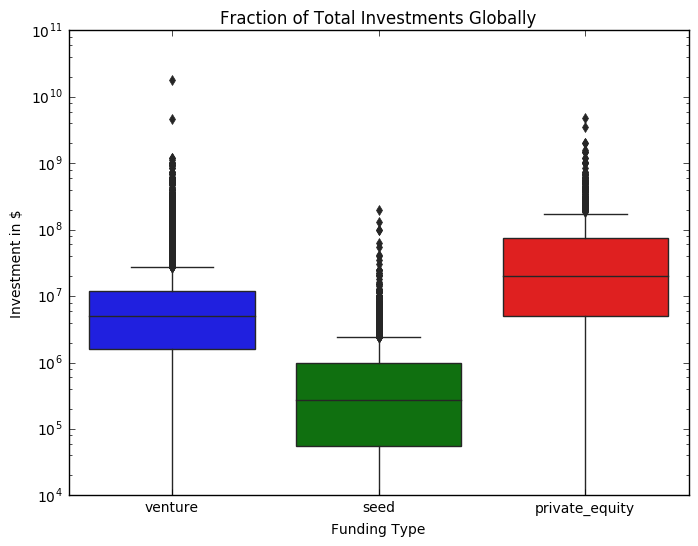

In [238]:
## A plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
## and the average amount of investment in each funding type. 
## This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

df_total_inv=master_frame[(master_frame['funding_round_type']=='venture')| (master_frame['funding_round_type']=='seed') | (master_frame['funding_round_type']=='private_equity')]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Fraction of Total Investments Globally')
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df_total_inv)
plt.xlabel("Funding Type")
plt.ylabel("Investment in $")
plt.yscale('log')
plt.show()

## The below box plot shows that most of the investments in the Venture fuding type lie in the 5 to 15 million range.
## This resonates with the investment that Sparks Funds wants to invest.

## The Seed funding type attracts much lower investments while private_equity shows much higher investments

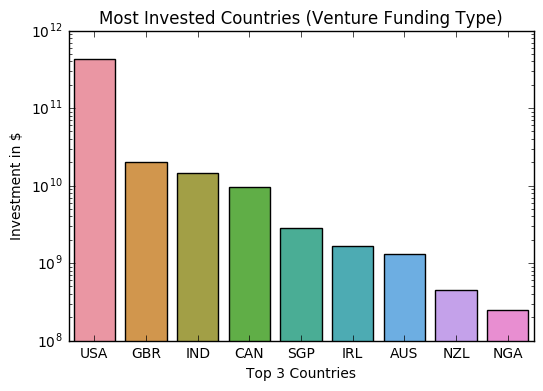

In [239]:
## A plot showing the top 9 countries against the total amount of investments of funding type FT. 
## This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

countriesinv=pd.DataFrame(df_by_country['raised_amount_usd'].sum())
top9=countriesinv.sort_values('raised_amount_usd',ascending=False)[0:9]

plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title('Most Invested Countries (Venture Funding Type)')
sns.barplot(x=top9.index, y="raised_amount_usd", data=top9, estimator=np.sum)
plt.xlabel("Top 3 Countries")
plt.ylabel("Investment in $")
plt.yscale('log')
plt.show()

## The below bar plot clearly shows that the top three countries where others are investing are USA, GBR and IND, respectively

In [240]:
## Stacking the three dataframes for investments in top 3 sectors in the top 3 countries

top3d1=investmentusa.sort_values('investment_count',ascending=False)[0:3]
top3d1['country_code']="USA"

top3d2=investmentgbrd2.sort_values('investment_count',ascending=False)[0:3]
top3d2['country_code']="GBR"

top3d3=investmentindd3.sort_values('investment_count',ascending=False)[0:3]
top3d3['country_code']="IND"

top3investmentchoice = pd.concat([top3d1, top3d2], axis = 0)
top3investmentchoice = pd.concat([top3investmentchoice, top3d3], axis = 0)
top3investmentchoice.rename(columns={'main_sector' : "Top 3 Sectors"},inplace=True)
print(top3investmentchoice)

   investment_count                            Top 3 Sectors country_code
0              2950                                   Others          USA
1              2714  Social, Finance, Analytics, Advertising          USA
2              2300               Cleantech / Semiconductors          USA
0               147                                   Others          GBR
1               133  Social, Finance, Analytics, Advertising          GBR
2               128               Cleantech / Semiconductors          GBR
0               110                                   Others          IND
1                60  Social, Finance, Analytics, Advertising          IND
2                52               News, Search and Messaging          IND


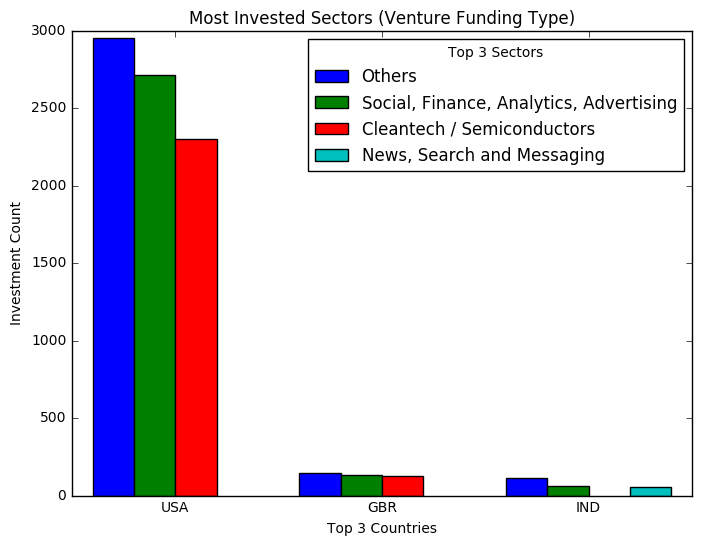

In [241]:
## A plot showing the number of investments in the top 3 sectors 
## of the top 3 countries on one chart (for the chosen investment type FT). 

# set figure size for larger figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

p=sns.barplot(x="country_code", y="investment_count", hue="Top 3 Sectors", data=top3investmentchoice,saturation=100)
plt.title('Most Invested Sectors (Venture Funding Type)')
plt.xlabel("Top 3 Countries")
plt.ylabel("Investment Count")
plt.show()